In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = [10,5]

In [301]:


def d_type(x):
    types = []
    for xi in x:
        types.append(train[xi].dtype)
    return types

def null_counts(data):
    #return number of missing values and proportion
    missing = data.isnull().sum().sort_values(ascending=False)
    percent = missing/len(data)
    frame = pd.concat([missing,percent],axis=1,keys=['missing','prop'])
    frame['type'] = d_type(list(frame.index))
    
    return frame.reset_index()

def drop_cols(train,test):
    #drop all columns in train set with missing values > 81.
    #drops same columns in test set
    nulls = null_counts(train)
    droplist = list(nulls['index'][nulls.missing > 81])
    train = train.drop(droplist,1)
    test = test.drop(droplist,1)
    
    return train,test

def get_numeric_missing(df):
    #returns list of numeric type column names containnig missing values
    df_nulls = null_counts(df)
    numerics = df_nulls['index'][(df_nulls['missing']>0)&
                                   ((df_nulls['type']=='float64')| (df_nulls['type']=='int64'))].to_list()
    return numerics

def get_cats_missing(df):
    #returns list of object type columns containing missing values
    df_nulls = null_counts(df)
    cats = df_nulls['index'][(df_nulls['missing']>0) & (df_nulls['type'] == 'object')].to_list()
    
    return cats

def fill_nulls(train,test):
    #nulls for these columns means the item does not exist.
    nonexistant = ['GarageType','GarageFinish','GarageCond','GarageQual',
            'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']
    
    train[nonexistant]=train[nonexistant].fillna('nil')
    test[nonexistant]=test[nonexistant].fillna('nil')

    numeric_train = get_numeric_missing(train)
    cats_train = get_cats_missing(train)
    
    train[numeric_train] = train[numeric_train].fillna(train[numeric_train].apply(np.mean))
    train[cats_train] = train[cats_train].fillna(train[cats_train].mode().iloc[0,:])
    
    
    numeric_test = get_numeric_missing(test)
    cats_test = get_cats_missing(test)
    
    test[cats_test] = test[cats_test].fillna(train[cats_test].mode().iloc[0,:])
    test[numeric_test] = test[numeric_test].fillna(test[numeric_test].apply(np.mean))
    
    train['MoSold'] = train['MoSold'].astype('object')
    test['MoSold'] = test['MoSold'].astype('object')
    train = train.drop(['Id'],1)
    
    return train,test

In [353]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#a 50-50 train test split

print('rows in test: ',len(train))
print('rows in train: ',len(test))

rows in test:  1460
rows in train:  1459


null values in the columns 'GarageType','GarageFinish','GarageCond','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual'  mean that those features do not exist on the property. They are filled in with 'nil' to indicate a new category.

All other missing categorical values are filled with the mode of that column
All missing numeric values are filled with the mean.

In [354]:
train,test = drop_cols(train,test)
train,test = fill_nulls(train,test)


In [355]:
train.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

<Figure size 1440x360 with 0 Axes>

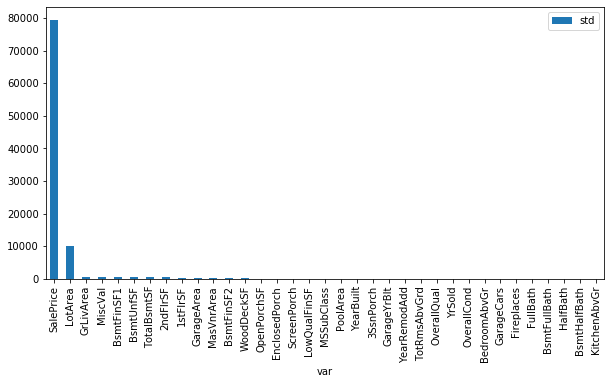

<Figure size 1440x360 with 0 Axes>

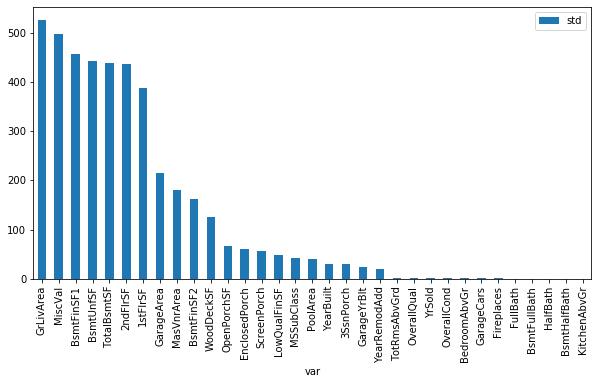

<Figure size 1440x360 with 0 Axes>

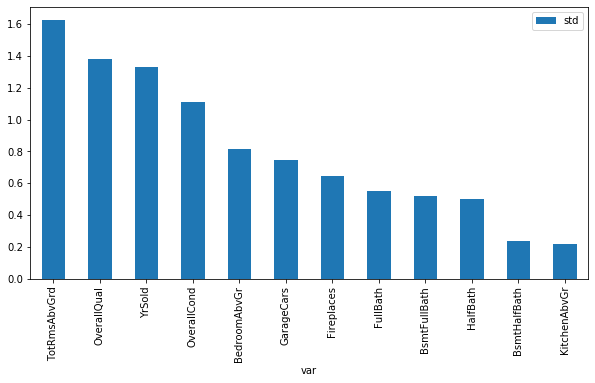

In [356]:
numeric_cols = train.select_dtypes(np.number).columns.to_list()
std = pd.DataFrame(train[numeric_cols]).std().reset_index()
std.columns = ['var','std']
plt.figure(figsize = (20,5))
std.sort_values(by='std',ascending=False).iloc[0:,:].plot.bar(x='var',y='std');
plt.figure(figsize = (20,5))
std.sort_values(by='std',ascending=False).iloc[2:,:].plot.bar(x='var',y='std');
plt.figure(figsize = (20,5))
std.sort_values(by='std',ascending=False).iloc[23:,:].plot.bar(x='var',y='std');